# Import Libararies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])
print(x,y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] [0 0 0 0 1 1 1 1 1 1]


In [5]:
model = LogisticRegression(solver='liblinear',random_state=2024)
model.fit(x,y)

LogisticRegression(random_state=2024, solver='liblinear')

In [9]:
model.classes_

array([0, 1])

In [10]:
print(model.intercept_,model.coef_)


[-1.04608067] [[0.51491375]]


In [11]:
model.predict_proba(x)[:,1]


array([0.25997843, 0.37024476, 0.4959368 , 0.62214451, 0.73371907,
       0.82178499, 0.88527921, 0.92813018, 0.95577487, 0.97309431])

In [12]:
model.predict(x)


array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [13]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [14]:
model.score(x,y)

0.9

In [15]:
y_pred = model.predict(x)
confusion_matrix(y,y_pred)

array([[3, 1],
       [0, 6]], dtype=int64)

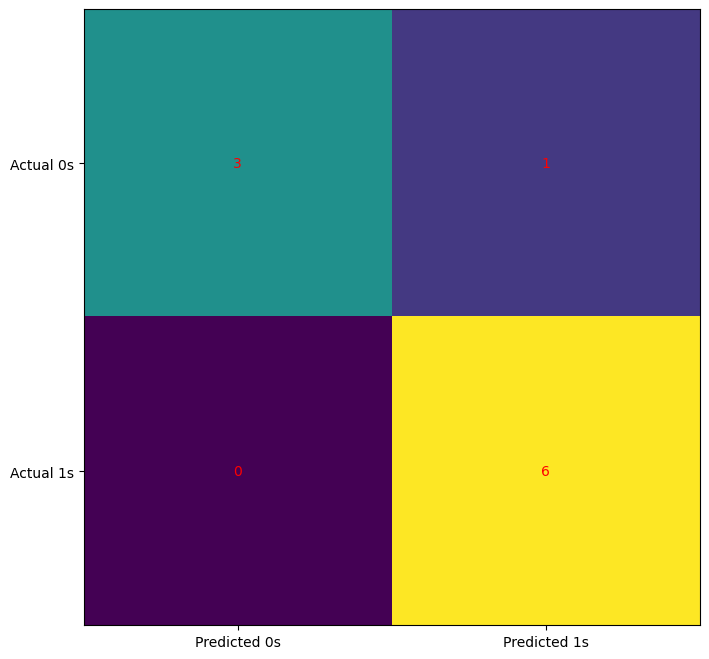

In [16]:
cm = confusion_matrix(y,y_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

In [17]:
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [19]:
model_tuned  = LogisticRegression(solver='liblinear',C=10.0, random_state=0)
model_tuned.fit(x,y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [22]:
model_tuned.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [23]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [25]:
y_pred_tuned = model_tuned.predict(x)
confusion_matrix(y,y_pred_tuned)

array([[4, 0],
       [0, 6]], dtype=int64)

In [26]:
print(classification_report(y,y_pred_tuned))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [30]:
x,y  = load_digits(return_X_y=True)
print(x,y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8]


In [33]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=0)
x_train

array([[ 0.,  3., 13., ..., 12.,  9.,  1.],
       [ 0.,  0.,  1., ..., 13.,  1.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

In [34]:
scaler = StandardScaler()
x_train  = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
model = LogisticRegression(solver='liblinear',C=0.05,multi_class='ovr',random_state=2024)
model.fit(x_train,y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=2024,
                   solver='liblinear')

In [38]:
model.score(x_train,y_train)

0.9665924276169265

In [39]:
model.score(x_test,y_test)

0.9355555555555556

In [40]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

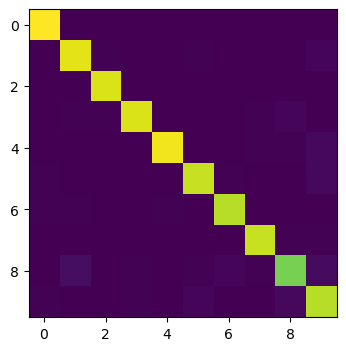

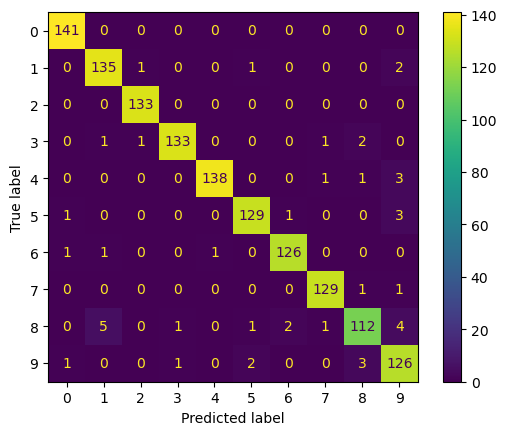

In [49]:
cm = confusion_matrix(y_train,y_pred_train)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow (cm)
ax.grid(False)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

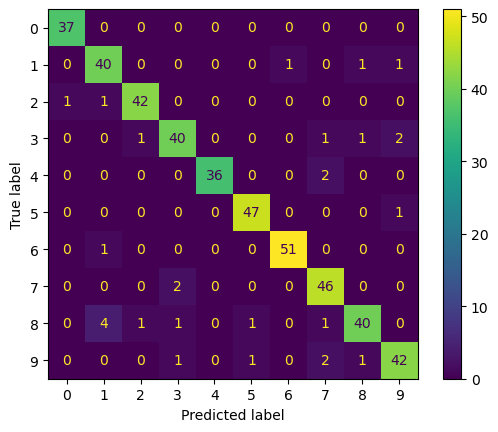

In [43]:
cm = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [44]:
print('Train Set')
print(classification_report(y_train,y_pred_train))
print('Test Set')
print(classification_report(y_test,y_pred_test))

Train Set
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       141
           1       0.95      0.97      0.96       139
           2       0.99      1.00      0.99       133
           3       0.99      0.96      0.97       138
           4       0.99      0.97      0.98       143
           5       0.97      0.96      0.97       134
           6       0.98      0.98      0.98       129
           7       0.98      0.98      0.98       131
           8       0.94      0.89      0.91       126
           9       0.91      0.95      0.93       133

    accuracy                           0.97      1347
   macro avg       0.97      0.97      0.97      1347
weighted avg       0.97      0.97      0.97      1347

Test Set
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.87      0.93      0.90        43
           2       0.95      0.95      0.95        44
     

In [50]:
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy',
          'Sunny','Overcast','Overcast','Rainy']
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool',
       'Mild','Mild','Mild','Hot','Mild']
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

print(len(weather),len(temp),len(play))

14 14 14


In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
weather_enc = le.fit_transform(weather) #var 1
temp_enc = le.fit_transform(temp) #var 2
play_enc = le.fit_transform(play) #var target
print(weather_enc)
print(temp_enc)
print(play_enc)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [52]:
temp_enc = le.fit_transform(temp)

Label = le.fit_transform(play)
print(temp_enc)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [53]:
features = list(zip(weather_enc,temp_enc))
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [55]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3) 
model.fit(features,Label)
predicted = model.predict([[0,2]])
print(predicted)

[1]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [59]:
y_pred = model.predict (features)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [60]:
print(classification_report(y ,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



In [62]:
from sklearn.datasets import load_wine
wine = load_wine()

In [63]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [64]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [65]:
wine['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [66]:
wine['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [67]:
wine['data'].shape

(178, 13)

In [68]:
wine['target'].shape

(178,)

In [69]:
import pandas as pd

In [72]:
x = pd.DataFrame(wine['data'],columns=wine['feature_names'])
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [73]:
y = pd.DataFrame(wine['target'],columns=['kultivar'])
y

,kultivar
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train, x_test, y_train,y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn = KNeighborsClassifier(n_neighbors=5)


In [91]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [93]:
y_pred = knn.predict(x_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [94]:
from sklearn import metrics

In [95]:
print('Accuracy :', accuracy_score(y_test,y_pred))

Accuracy : 0.7777777777777778


In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [103]:
from sklearn.metrics import accuracy_score

In [104]:
print('Accuracy :', accuracy_score(y_test,y_pred))

Accuracy : 0.7592592592592593


In [105]:
y_pred

array([1, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 2, 1, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 2,
       1, 0, 0, 0, 0, 0, 1, 0, 2, 0])

In [110]:
error = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)

In [112]:
knn.fit(x_train, y_train)
pred_i = knn.predict(x_test)
error.append(np.mean(pred_i !=y_test))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
